                          #  *NN Arabic Handwriting Recognition*

    
    
       
Name: Kenzy mohamed ali 
ID: 320210183
Group: 1 sec: AID 3

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers #for normalization
from tensorflow.keras import regularizers
from 

In [7]:
datapath = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test',
           '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset']
CLASS = 65
IMG_SIZE = (250,250)
BATCH_SIZE = 500
SEED = 43
TIMES = 50
LABEL_NAMES = [i for i in range(CLASS)]

# Data Pre-processing:
*we will start to splitting the data to training data , validation data and testing data*

In [8]:
x_train = tf.keras.utils.image_dataset_from_directory(
        datapath[0],
        label_mode="categorical",
        color_mode='grayscale',
        subset="training",
        shuffle=True,
        validation_split=0.2, 
        seed = SEED,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [9]:
x_val = tf.keras.utils.image_dataset_from_directory(
        datapath[0],
        label_mode="categorical",
        color_mode='grayscale',
        subset="validation",
        shuffle=True,
        validation_split=0.2,
        seed = SEED,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


In [10]:
x_test = tf.keras.utils.image_dataset_from_directory(
        datapath[1],
        labels=None,
        shuffle=False,
        label_mode="categorical",
        color_mode='grayscale',
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE)

Found 10640 files belonging to 1 classes.


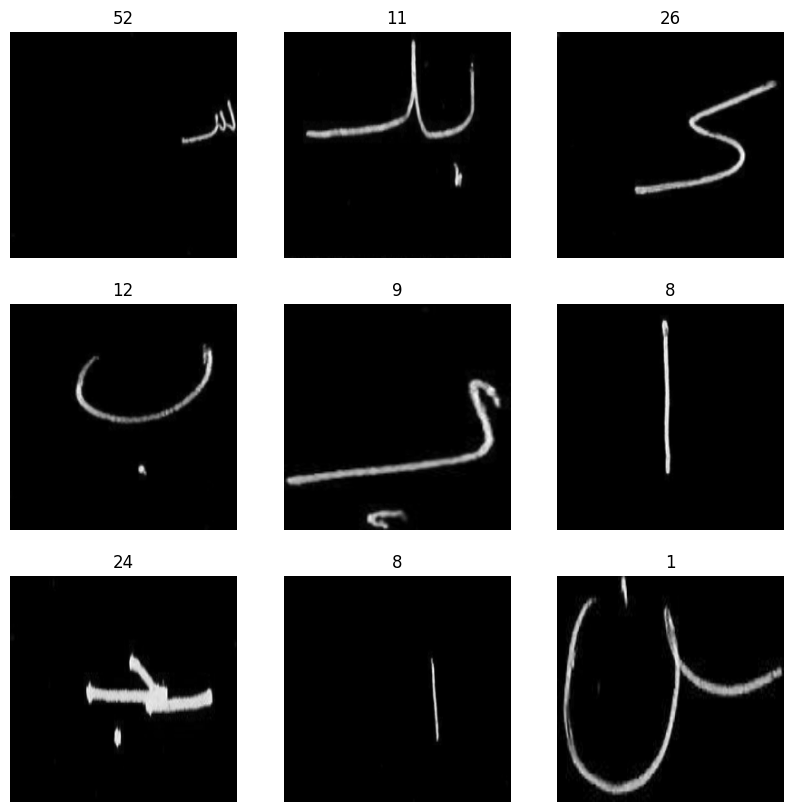

In [11]:
class_names = x_train.class_names
plt.figure(figsize=(10, 10))
for images, labels in x_train.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.binary)
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])
        plt.axis("off")

In [12]:
for images, labels in x_train:
    print(images.shape)
    print(labels.shape)
    break

(500, 250, 250, 1)
(500, 65)


*Now we will start to normailze the pixels of the training images to make the calculation process easy (Neural network)*

# *Create a Deep Neural Network* 

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)
                         ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(CLASS, activation=tf.nn.softmax)
])

model.build(input_shape=(BATCH_SIZE, IMG_SIZE[0], IMG_SIZE[1], 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (500, 250, 250, 1)        0         
                                                                 
 conv2d (Conv2D)             (500, 250, 250, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (500, 125, 125, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (500, 125, 125, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (500, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (500, 62, 62, 64)         3

# *Training the Model:*

In [ ]:
model.compile(optimizer = Adam(learning_rate= 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])
h1 = model.fit(x_train,validation_data=x_val,epochs=TIMES)

Epoch 1/50
69/69 [==============================] - 88s 904ms/step - loss: 4.4413 - accuracy: 0.0144 - val_loss: 4.2053 - val_accuracy: 0.0168
Epoch 2/50
69/69 [==============================] - 61s 849ms/step - loss: 3.6968 - accuracy: 0.1030 - val_loss: 2.7651 - val_accuracy: 0.2792
Epoch 3/50
69/69 [==============================] - 61s 848ms/step - loss: 2.0620 - accuracy: 0.4495 - val_loss: 1.5501 - val_accuracy: 0.5881
Epoch 4/50
69/69 [==============================] - 61s 857ms/step - loss: 1.3134 - accuracy: 0.6535 - val_loss: 1.0988 - val_accuracy: 0.7178
Epoch 5/50
69/69 [==============================] - 61s 852ms/step - loss: 0.9868 - accuracy: 0.7529 - val_loss: 0.9586 - val_accuracy: 0.7618
Epoch 6/50
69/69 [==============================] - 61s 852ms/step - loss: 0.8056 - accuracy: 0.8066 - val_loss: 0.8639 - val_accuracy: 0.7965
Epoch 7/50
69/69 [==============================] - 61s 852ms/step - loss: 0.7050 - accuracy: 0.8414 - val_loss: 0.8170 - val_accuracy: 0.8121

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting Loss Curve
plt.subplot(1, 2, 2)
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# *Saving and loading the Model:*

In [ ]:
model.save('Kenzy_Arabic_handwritten_recognition.keras')
model = tf.keras.models.load_model('Kenzy_Arabic_handwritten_recognition.keras')

In [ ]:
plt.figure(figsize=(10, 10))
for images in x_test.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.binary)

In [ ]:
for images in x_test:
    print(images.shape)
    break

In [ ]:
predictions = model.predict(x_test)

In [ ]:
img_list = os.listdir(datapath[1])
labels_list = sorted(os.listdir(datapath[0]))
print(labels_list)

In [ ]:
predictions[1][22]

In [ ]:
df_predictions = pd.DataFrame(columns=['ID','Label'], dtype=(np.int32,np.int32))

predictions_mod = np.argmax(pred, 1)

for idx,image in enumerate(sorted(img_list)):
#     print(image, predictions_mod[idx])
    df2 = pd.DataFrame([[int(image.split(".")[0]), int(labels_list[predictions_mod[idx]])]], columns=['ID','Label'])
    df_predictions = pd.concat([df_predictions, df2])
    

In [ ]:
print(predictions_mod)

In [ ]:
df_predictions.sort_values(by='ID', inplace=True)
df_predictions.reset_index(drop=True)

In [ ]:
df_predictions.to_csv('pred.csv', index=False, header=True) 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

#Assuming you have df_predictions and true labels df_predictions 
df_predictions.sort_values('ID') # Sort the DataFrame based on IDs

# Extract true labels from the DataFrame 
true_labels_df = df_predictions['Label'].values

#Extract predicted labels from the DataFrame 
predicted_labels_df = df_predictions['Label'].values

#Create confusion matrix 
cm = confusion_matrix(true_labels_df, predicted_labels_df)

#Display confusion matrix

class_labels = [str(i) for i in range(NUM_CLASS)] # Assuming class labels are integers from 0 to NUM CLASS-1 disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels) disp.plot(cmap='Blues', values_format='d')

plt.show()